In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
plt.rc("figure", figsize=(17, 9))
plt.rc("font", size=14)

In [3]:
NAICS_72_df = pd.read_csv('cleaned_NACIS72_df.csv')
df_NAICS_71 = pd.read_csv('NAICs71_cleaned.csv')

In [7]:
NAICS_72_df.columns

Index(['Unnamed: 0', 'Number of employees', 'Number of Establishments', 'year',
       'Net Job Creation', 'Rate of Job loss', 'Smoke_estimate',
       'Annual Real GDP'],
      dtype='object')

In [20]:
NAICS_72_df.head()

,Unnamed: 0,Number of employees,Number of Establishments,year,Net Job Creation,Rate of Job loss,Smoke_estimate,Annual Real GDP
0,0,"52,582","2,861",2005,4.320,6.537,1.278738e+10,5878.9
1,1,"55,048","2,985",2006,4.957,6.086,2.979324e+10,6204.8
2,2,"56,686","3,103",2007,3.376,5.508,1.106730e+11,6281.3
3,3,"56,647","3,156",2008,0.269,5.528,5.230022e+09,6146.7
4,4,"53,469","3,154",2009,−6.128,6.402,1.789286e+09,5560.4


In [23]:
NAICS_72_df
print(NAICS_72_df['Number of employees'].dtype)

# Replace commas and convert the column to numeric type
NAICS_72_df['Number of employees'] = NAICS_72_df['Number of employees'].str.replace(',', '').astype(int)
NAICS_72_df['Number of Establishments'] = NAICS_72_df['Number of Establishments'].str.replace(',', '').astype(int)



int64


AttributeError: Can only use .str accessor with string values!

In [29]:
NAICS_72_df.dtypes

Unnamed: 0                    int64
Number of employees           int64
Number of Establishments      int64
year                          int64
Net Job Creation            float64
Rate of Job loss            float64
Smoke_estimate              float64
Annual Real GDP             float64
dtype: object

In [27]:
 NAICS_72_df['Net Job Creation'] = NAICS_72_df['Net Job Creation'].str.replace('−', '-')

columns_to_convert = ['Net Job Creation']  # Replace with your column names
# Convert multiple columns to a specific data type (e.g., float, int, etc.)
NAICS_72_df[columns_to_convert] = NAICS_72_df[columns_to_convert].astype('float64')


In [108]:
# Regression  for the first 
# MSE 
# Cofficent meaning 
X_72 = NAICS_72_df[['Net Job Creation','Rate of Job loss','Smoke_estimate',
                'Annual Real GDP', 'year']]
y_72 = NAICS_72_df['Number of employees']

In [109]:
X

,Net Job Creation,Rate of Job loss,Smoke_estimate,Annual_Real_GDP,year
0,-2.450,5.991,1.278738e+10,1293.6,2005
1,10.966,6.208,2.979324e+10,1415.2,2006
2,1.688,5.108,1.106730e+11,1555.5,2007
3,-2.241,4.018,5.230022e+09,1497.7,2008
4,-2.493,6.767,1.789286e+09,1378.8,2009
5,1.256,5.057,8.601896e+09,1568.1,2010
6,0.373,4.487,5.609023e+09,1469.7,2011
7,1.563,3.623,9.517011e+10,1501.6,2012
8,6.682,3.728,1.375299e+10,1538.1,2013
9,-1.219,2.057,4.286207e+10,1600.5,2014


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_72, y_72, test_size=0.3, random_state=42)
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using ‘OLS’
Naics72_Job_amount_model = sm.OLS(y_train, X_train_sm).fit()

In [111]:
print(Job_amount_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Number of employees   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.364
Method:                  Least Squares   F-statistic:                     2.145
Date:                 Fri, 01 Dec 2023   Prob (F-statistic):              0.211
Time:                         16:33:54   Log-Likelihood:                -80.038
No. Observations:                   11   AIC:                             172.1
Df Residuals:                        5   BIC:                             174.5
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.959e+05   

/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


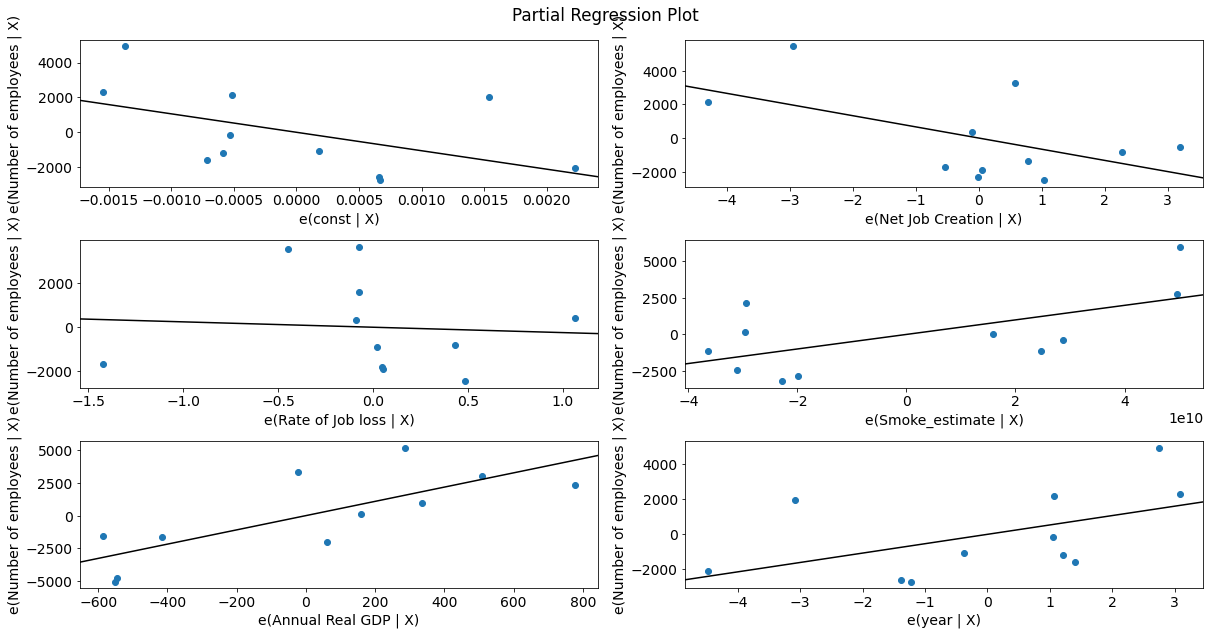

In [74]:
fig = sm.graphics.plot_partregress_grid(Naics72_Job_amount_model)
fig.tight_layout(pad=1.0)

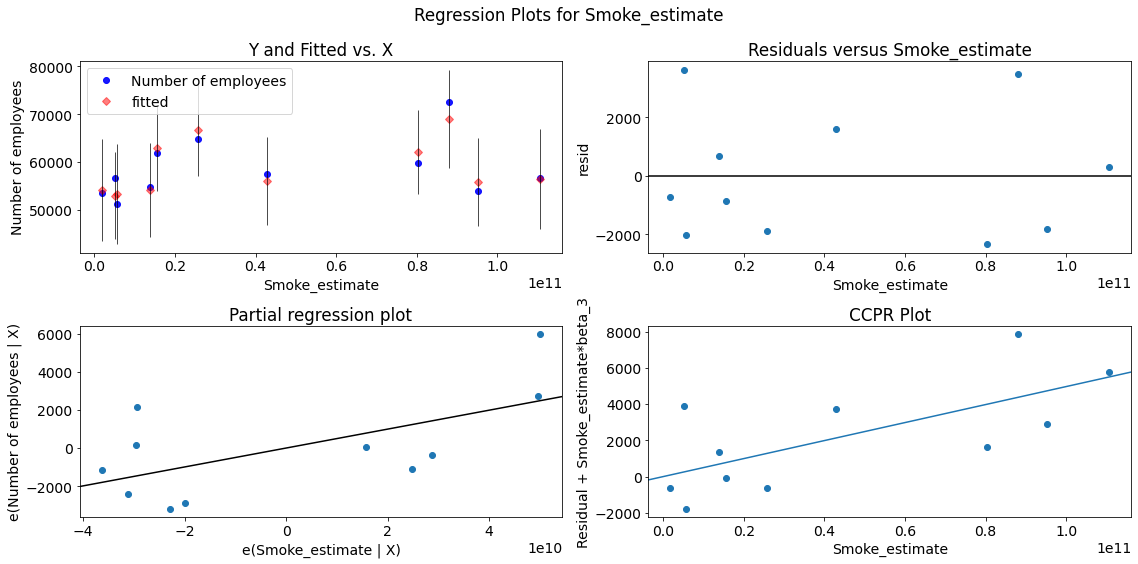

In [54]:
fig = sm.graphics.plot_regress_exog(Naics72_Job_amount_model, 'Smoke_estimate')
fig.tight_layout(pad=1.0)

In [ ]:
# Stand alone regression between 


In [57]:
lin_X_72 = NAICS_72_df[['Smoke_estimate']]
lin_y_72 = NAICS_72_df['Annual Real GDP']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(lin_X_72, lin_X_72, test_size=0.05, random_state=42)
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using ‘OLS’
Naics72_Annual_GDP_model = sm.OLS(y_train, X_train_sm).fit()

In [64]:
print(Naics72_Annual_GDP_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Smoke_estimate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.402e+31
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          4.01e-198
Time:                        14:59:03   Log-Likelihood:                 136.68
No. Observations:                  15   AIC:                            -269.4
Df Residuals:                      13   BIC:                            -268.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.192e-05   1.05e-05      1.

/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


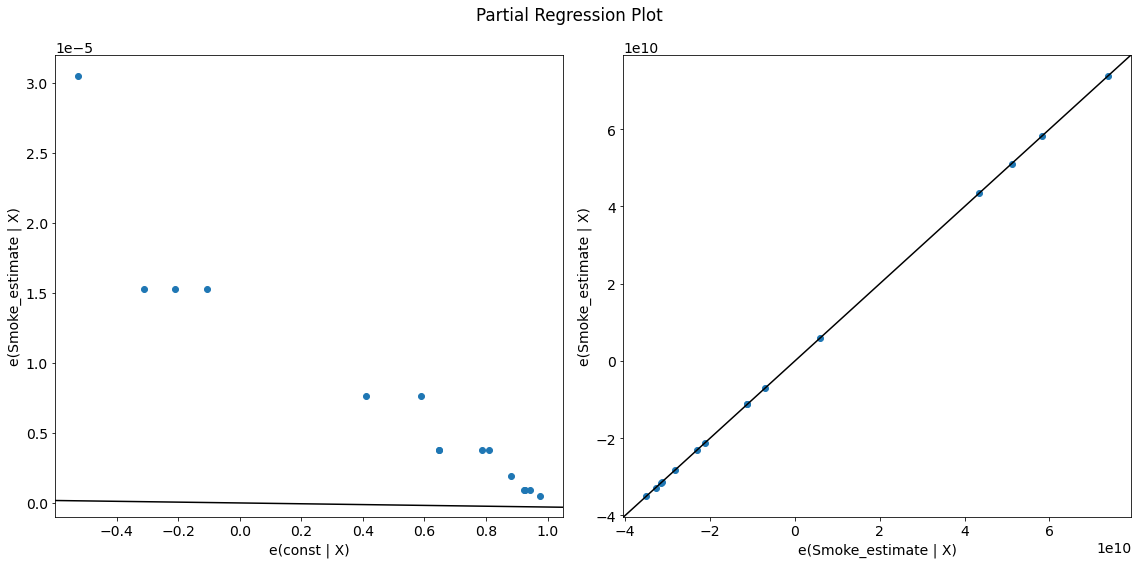

In [65]:
fig = sm.graphics.plot_partregress_grid(Naics72_Annual_GDP_model)
fig.tight_layout(pad=1.0)

In [ ]:
# Regression Plot for the second  
# MSE 
# Cofficent meaning 

In [ ]:
df_NAICS_71

In [32]:
df_NAICS_71
print(df_NAICS_71['Number of employees'].dtype)

# Replace commas and convert the column to numeric type
df_NAICS_71['Number of employees'] = df_NAICS_71['Number of employees'].str.replace(',', '').astype(int)
df_NAICS_71['Number of Establishments'] = df_NAICS_71['Number of Establishments'].str.replace(',', '').astype(int)



object


AttributeError: Can only use .str accessor with string values!

In [35]:
df_NAICS_71.dtypes

Unnamed: 0                    int64
Number of employees           int64
Number of Establishments      int64
year                          int64
Net Job Creation            float64
Rate of Job loss            float64
Smoke_estimate              float64
Annual_Real_GDP             float64
dtype: object

In [104]:
df_NAICS_71['Net Job Creation'] = df_NAICS_71['Net Job Creation'].str.replace('−', '-')

columns_to_convert = ['Net Job Creation']  # Replace with your column names
# Convert multiple columns to a specific data type (e.g., float, int, etc.)
df_NAICS_71[columns_to_convert] = df_NAICS_71[columns_to_convert].astype('float64')

AttributeError: Can only use .str accessor with string values!

In [105]:
# Regression  for the first 
# MSE 
# Cofficent meaning 
X = df_NAICS_71[['Net Job Creation','Rate of Job loss','Smoke_estimate',
                'Annual_Real_GDP', 'year']]
y = df_NAICS_71['Number of employees']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using ‘OLS’
Job_amount_model = sm.OLS(y_train, X_train_sm).fit()

In [107]:
print(Job_amount_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Number of employees   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.364
Method:                  Least Squares   F-statistic:                     2.145
Date:                 Fri, 01 Dec 2023   Prob (F-statistic):              0.211
Time:                         16:33:47   Log-Likelihood:                -80.038
No. Observations:                   11   AIC:                             172.1
Df Residuals:                        5   BIC:                             174.5
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.959e+05   

/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


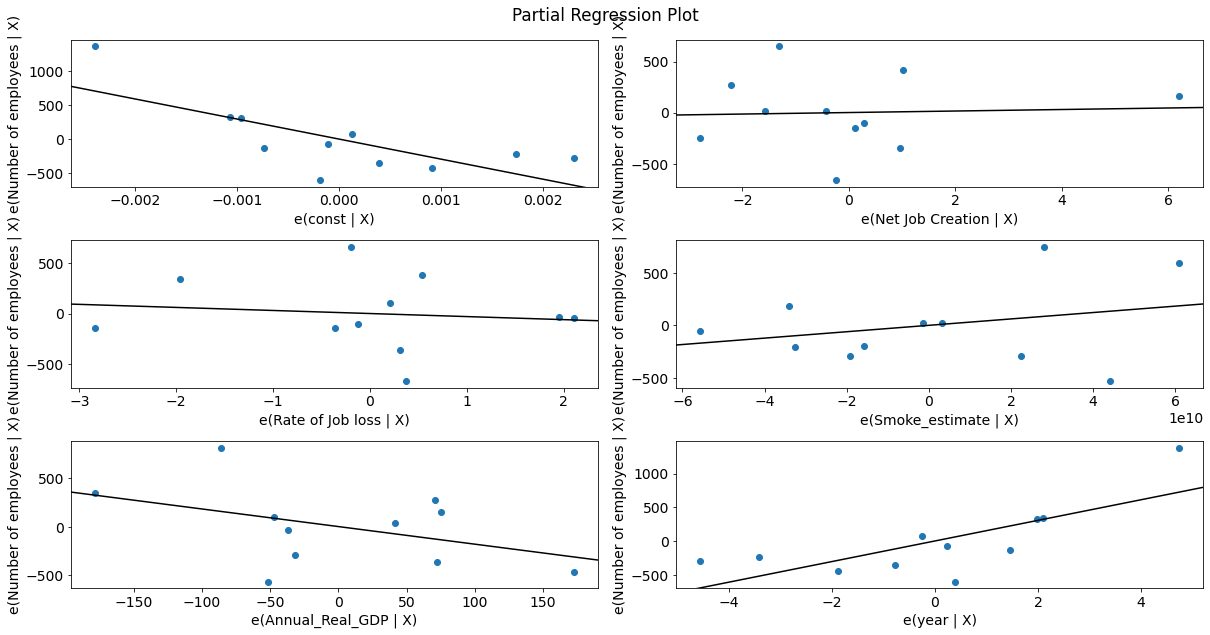

In [79]:
fig = sm.graphics.plot_partregress_grid(Job_amount_model)
fig.tight_layout(pad=1.0)

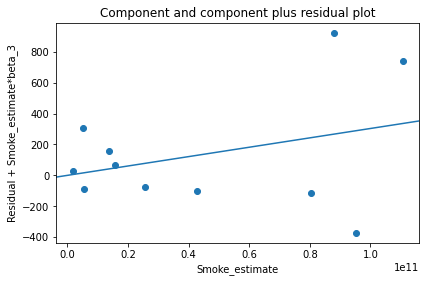

In [41]:
fig = sm.graphics.plot_ccpr(Job_amount_model, 'Smoke_estimate')
fig.tight_layout(pad=1.0)

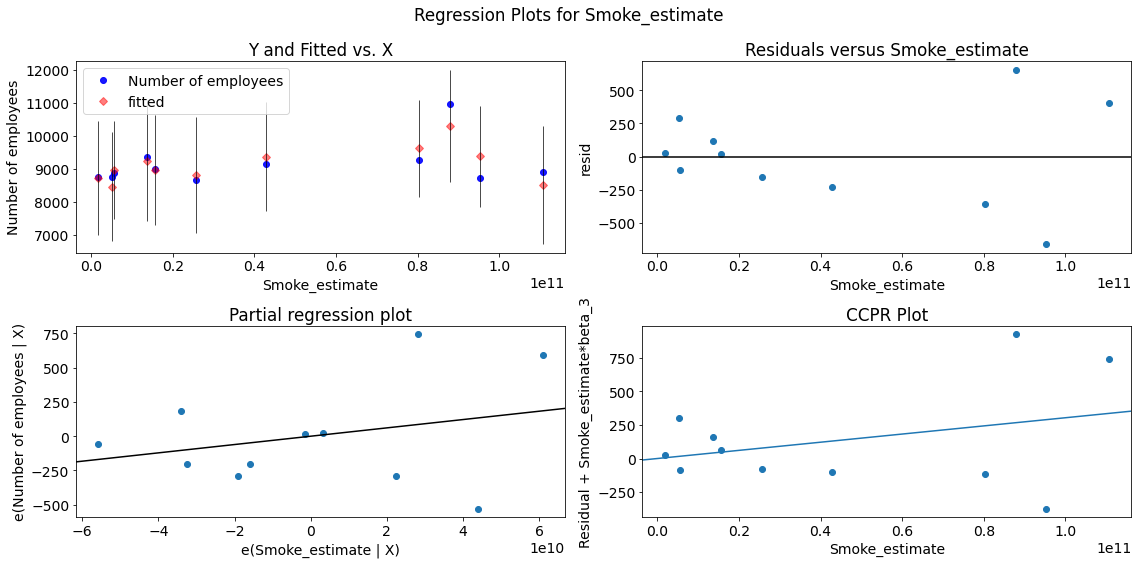

In [56]:
fig = sm.graphics.plot_regress_exog(Job_amount_model, 'Smoke_estimate')
fig.tight_layout(pad=1.0)

/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nhoward/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

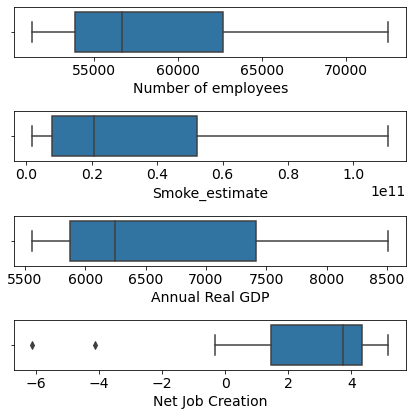

In [72]:
fig, axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(NAICS_72_df['Number of employees'], ax = axs[0])
plt2 = sns.boxplot(NAICS_72_df['Smoke_estimate'], ax = axs[1])
plt3 = sns.boxplot(NAICS_72_df['Annual Real GDP'], ax = axs[2])
plt4 = sns.boxplot(NAICS_72_df['Net Job Creation'], ax = axs[3])

plt.tight_layout()

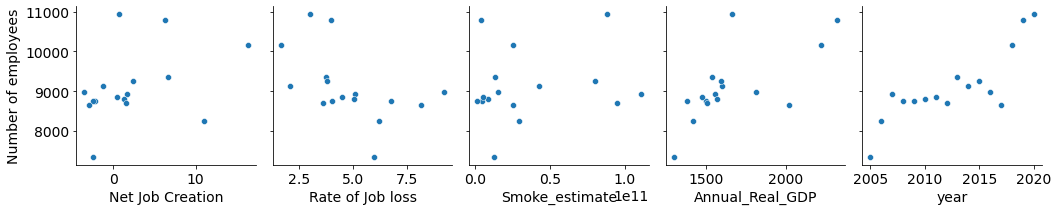

In [91]:

sns.pairplot(df_NAICS_71, x_vars=['Net Job Creation','Rate of Job loss','Smoke_estimate',
                'Annual_Real_GDP', 'year'], y_vars='Number of employees', height=3, aspect=1, kind='scatter')
plt.show()

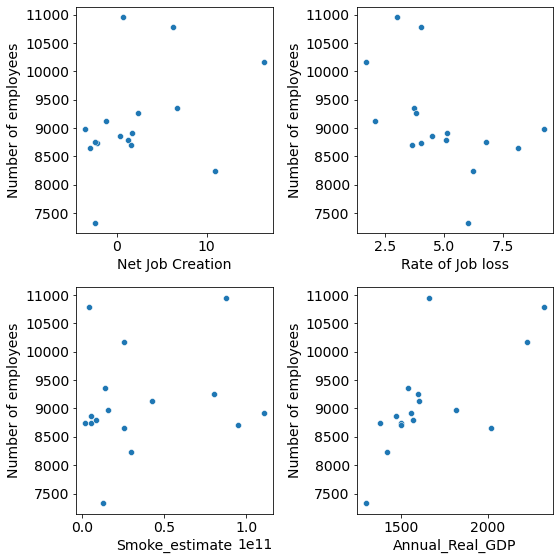

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Adjust figsize as needed

# Top row pair plots
sns.scatterplot(x='Net Job Creation', y='Number of employees', data=df_NAICS_71, ax=axs[0, 0])
sns.scatterplot(x='Rate of Job loss', y='Number of employees', data=df_NAICS_71, ax=axs[0, 1])

# Bottom row pair plots
sns.scatterplot(x='Smoke_estimate', y='Number of employees', data=df_NAICS_71, ax=axs[1, 0])
sns.scatterplot(x='Annual_Real_GDP', y='Number of employees', data=df_NAICS_71, ax=axs[1, 1])

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
[Unnamed: 0', 'Number of employees', 'Number of Establishments', 'year',
       'Net Job Creation', 'Rate of Job loss', 'Smoke_estimate',
       'Annual Real GDP'],
      dtype='object')